In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt

In [2]:
os.listdir("./")

['.ipynb_checkpoints', 'Groceries_dataset.csv', 'Untitled.ipynb']

In [3]:
df = pd.read_csv("./Groceries_dataset.csv")

# KIỂM TRA THÔNG TIN

- kiểm tra số các thuộc tính và quan sát


In [4]:
df.info()
# có 38765 quan sát và 3 thuộc tính: member_number, Date, itemDescription

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38765 entries, 0 to 38764
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Member_number    38765 non-null  int64 
 1   Date             38765 non-null  object
 2   itemDescription  38765 non-null  object
dtypes: int64(1), object(2)
memory usage: 908.7+ KB


- xem 5 dòng đầu tiên

In [5]:
df.head()

,Member_number,Date,itemDescription
0,1808,21-07-2015,tropical fruit
1,2552,05-01-2015,whole milk
2,2300,19-09-2015,pip fruit
3,1187,12-12-2015,other vegetables
4,3037,01-02-2015,whole milk


- kiểm tra xem có thuộc tính nào null không

In [6]:
df.isnull().sum()
# không có dữ liệu null

Member_number      0
Date               0
itemDescription    0
dtype: int64

- lọc các thông về người dùng có id là 2300 và sort theo Date

In [7]:
user_2300_info = df[df['Member_number']==2300]
user_2300_info.sort_values(by='Date')

,Member_number,Date,itemDescription
5642,2300,05-08-2015,frankfurter
21791,2300,05-08-2015,long life bakery product
9820,2300,16-03-2014,pork
25969,2300,16-03-2014,fruit/vegetable juice
2,2300,19-09-2015,pip fruit
16151,2300,19-09-2015,other vegetables
36090,2300,19-09-2015,flour
5354,2300,28-04-2015,sausage
21503,2300,28-04-2015,white wine
36538,2300,28-04-2015,hygiene articles


- lấy thông tin người dùng id là 1234 và 4321

In [8]:
df[(df['Member_number']==1234) | (df['Member_number']==4321)].sort_values(by=["Date",'Member_number'])

,Member_number,Date,itemDescription
2888,4321,08-05-2015,curd
7285,4321,08-05-2015,frankfurter
19037,4321,08-05-2015,white bread
23434,4321,08-05-2015,pip fruit
34949,4321,08-05-2015,waffles
14039,1234,12-05-2014,curd
30188,1234,12-05-2014,pastry
6174,4321,12-09-2015,sausage
22323,4321,12-09-2015,newspapers
14174,4321,13-08-2014,grapes


- kiểm tra các mặt hàng không trùng lặp

In [9]:
df.itemDescription.unique()

array(['tropical fruit', 'whole milk', 'pip fruit', 'other vegetables',
       'rolls/buns', 'pot plants', 'citrus fruit', 'beef', 'frankfurter',
       'chicken', 'butter', 'fruit/vegetable juice',
       'packaged fruit/vegetables', 'chocolate', 'specialty bar',
       'butter milk', 'bottled water', 'yogurt', 'sausage', 'brown bread',
       'hamburger meat', 'root vegetables', 'pork', 'pastry',
       'canned beer', 'berries', 'coffee', 'misc. beverages', 'ham',
       'turkey', 'curd cheese', 'red/blush wine',
       'frozen potato products', 'flour', 'sugar', 'frozen meals',
       'herbs', 'soda', 'detergent', 'grapes', 'processed cheese', 'fish',
       'sparkling wine', 'newspapers', 'curd', 'pasta', 'popcorn',
       'finished products', 'beverages', 'bottled beer', 'dessert',
       'dog food', 'specialty chocolate', 'condensed milk', 'cleaner',
       'white wine', 'meat', 'ice cream', 'hard cheese', 'cream cheese ',
       'liquor', 'pickled vegetables', 'liquor (appetizer

In [10]:
len(df.itemDescription.unique())

167

# Tiền xử lý dữ liệu

- kiểm tra các thành phần trùng lặp

In [11]:
df[df.duplicated]

,Member_number,Date,itemDescription
5015,2051,11-09-2015,frankfurter
5022,3055,18-08-2015,other vegetables
5044,1994,11-03-2015,whole milk
5055,1682,25-06-2015,pip fruit
5059,4324,05-01-2015,sausage
...,...,...,...
38614,2027,26-02-2014,domestic eggs
38684,2936,07-03-2014,newspapers
38685,2311,13-03-2014,pot plants
38722,3834,18-05-2014,salty snack


In [12]:
"""
Quan sát user với id=2051 thấy có sự trùng lặp tại giá trị. 
Điều này cho thấy rằng người dùng này đã mua cùng 1 mặt hàng trong cùng 1 ngày
"""
df[(df['Member_number']==2051) & (df['itemDescription']=='frankfurter')].sort_values(by='itemDescription')

,Member_number,Date,itemDescription
4004,2051,11-09-2015,frankfurter
5015,2051,11-09-2015,frankfurter


In [13]:
# loại bỏ trùng lặp, giữ lại lần xuất hiện đầu tiên
df = df.drop_duplicates(keep='first')

In [14]:
"""Sau khi loại bỏ trùng lặp, dữ liệu từ 38765-> 38006"""
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 38006 entries, 0 to 38764
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Member_number    38006 non-null  int64 
 1   Date             38006 non-null  object
 2   itemDescription  38006 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.2+ MB


In [15]:
# tách date -> thành day/month/year/
datetime_ = df['Date'].str.split('-',expand=True)
df['day'] = datetime_[0]
df['month'] = datetime_[1]
df['year'] = datetime_[2]


In [16]:
df

,Member_number,Date,itemDescription,day,month,year
0,1808,21-07-2015,tropical fruit,21,07,2015
1,2552,05-01-2015,whole milk,05,01,2015
2,2300,19-09-2015,pip fruit,19,09,2015
3,1187,12-12-2015,other vegetables,12,12,2015
4,3037,01-02-2015,whole milk,01,02,2015
...,...,...,...,...,...,...
38760,4471,08-10-2014,sliced cheese,08,10,2014
38761,2022,23-02-2014,candy,23,02,2014
38762,1097,16-04-2014,cake bar,16,04,2014
38763,1510,03-12-2014,fruit/vegetable juice,03,12,2014


- chuyển tháng từ số thành chữ tiếng anh

In [17]:
month_change = {"01":"Jan","02":"Feb","03":"Mar","04":"Apr","05":"May","06":"Jun","07":"Jul","08":"Aug","09":"Sep",
               "10":"Oct","11":"Nov","12":"Dec"}
df['month'] = df.month.apply(lambda x: month_change[x])

- tìm ngày trong tuần ứng với dữ liệu đã cho

In [18]:
from datetime import datetime
df['Date'] = pd.to_datetime(df['Date'], format="%d-%m-%Y")
df['DayOfWeek'] = df['Date'].dt.day_name()
df

,Member_number,Date,itemDescription,day,month,year,DayOfWeek
0,1808,2015-07-21,tropical fruit,21,Jul,2015,Tuesday
1,2552,2015-01-05,whole milk,05,Jan,2015,Monday
2,2300,2015-09-19,pip fruit,19,Sep,2015,Saturday
3,1187,2015-12-12,other vegetables,12,Dec,2015,Saturday
4,3037,2015-02-01,whole milk,01,Feb,2015,Sunday
...,...,...,...,...,...,...,...
38760,4471,2014-10-08,sliced cheese,08,Oct,2014,Wednesday
38761,2022,2014-02-23,candy,23,Feb,2014,Sunday
38762,1097,2014-04-16,cake bar,16,Apr,2014,Wednesday
38763,1510,2014-12-03,fruit/vegetable juice,03,Dec,2014,Wednesday


- lấy các dữ liệu tháng 1

In [19]:
z = df[df['month']=="Jan"]
z

,Member_number,Date,itemDescription,day,month,year,DayOfWeek
1,2552,2015-01-05,whole milk,05,Jan,2015,Monday
27,1420,2015-01-14,other vegetables,14,Jan,2015,Wednesday
29,4918,2015-01-27,yogurt,27,Jan,2015,Tuesday
37,1495,2015-01-09,root vegetables,09,Jan,2015,Friday
59,1967,2015-01-20,other vegetables,20,Jan,2015,Tuesday
...,...,...,...,...,...,...,...
38665,3430,2014-01-12,vinegar,12,Jan,2014,Sunday
38699,4759,2014-01-24,frozen vegetables,24,Jan,2014,Friday
38714,2174,2014-01-05,domestic eggs,05,Jan,2014,Sunday
38726,3998,2014-01-08,long life bakery product,08,Jan,2014,Wednesday


In [21]:
combinacoes = z.groupby(['Member_number','DayOfWeek']).agg({"itemDescription":list}).reset_index()

In [22]:
combinacoes

,Member_number,DayOfWeek,itemDescription
0,1001,Tuesday,"[frankfurter, soda, whipped/sour cream]"
1,1003,Sunday,"[frozen meals, dental care]"
2,1005,Thursday,"[whipped/sour cream, rolls/buns, margarine]"
3,1009,Friday,"[canned fish, cocoa drinks]"
4,1013,Friday,"[hard cheese, napkins, bottled water]"
...,...,...,...
1259,4987,Wednesday,"[condensed milk, waffles, domestic eggs]"
1260,4991,Monday,"[processed cheese, hygiene articles]"
1261,4993,Wednesday,"[chocolate, brown bread]"
1262,4997,Sunday,"[whole milk, canned beer]"


In [23]:
combinacoes_list = combinacoes['itemDescription'].tolist()

In [24]:
from apyori import apriori

In [31]:
rules = apriori(combinacoes_list, min_support=0.004, min_confidence=0.05, min_lift=1.2, min_length=2, max_length=2)

In [32]:
results = list(rules)
def inspect(results):
    lhs = [tuple(result[2][0][0])[0] for result in results]
    rhs = [tuple(result[2][0][1])[0] for result in results]
    support = [result[1]*100 for result in results]
    confidence = [result[2][0][2]*100 for result in results]
    lift = [result[2][0][3] for result in results]
    return list(zip(lhs,rhs,support,confidence,lift))
final_result = pd.DataFrame(inspect(results), columns=['Product 1','Product 2','Support(%)','Confidence(%)','lift'])
#test_ = list(final_result['Product 1'],final_result['Product 2'])
final_result['Rule'] = final_result['Product 1'] + '->' + final_result['Product 2']

In [33]:
final_result

,Product 1,Product 2,Support(%),Confidence(%),lift,Rule
0,beef,root vegetables,0.474684,13.043478,1.831884,beef->root vegetables
1,bottled beer,newspapers,0.474684,10.909091,2.757818,bottled beer->newspapers
2,bottled beer,whole milk,0.949367,21.818182,1.482698,bottled beer->whole milk
3,bottled water,domestic eggs,0.474684,8.955224,2.058073,bottled water->domestic eggs
4,butter,root vegetables,0.870253,25.000000,3.511111,butter->root vegetables
5,canned beer,soda,0.791139,15.873016,1.497276,canned beer->soda
6,canned beer,yogurt,0.553797,11.111111,1.276768,canned beer->yogurt
7,chicken,rolls/buns,0.474684,14.634146,1.216945,chicken->rolls/buns
8,citrus fruit,whipped/sour cream,0.474684,8.823529,2.027807,citrus fruit->whipped/sour cream
9,coffee,rolls/buns,0.553797,19.444444,1.616959,coffee->rolls/buns


In [34]:
import matplotlib.pyplot as plt


Text(0.5, 0, 'Confidence')

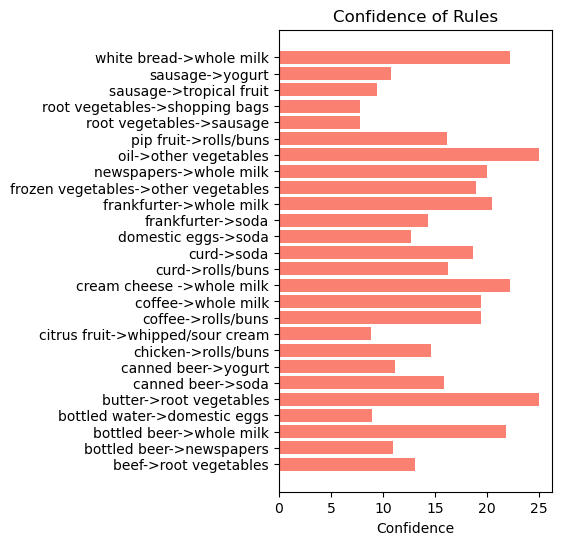

In [40]:
plt.figure(figsize=(12, 6))

# Vẽ biểu đồ Confidence
plt.subplot(1, 3, 3)
plt.barh(final_result['Rule'], final_result['Confidence(%)'], color='salmon')
plt.title('Confidence of Rules')
plt.xlabel('Confidence')
